In [74]:
import numpy
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
#import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#SHAP
import shap
import xgboost
from mpl_toolkits import mplot3d




import pandas as pd
from sklearn.datasets import make_regression
import random
from pygam import LinearGAM, s, f


In [99]:
#DGP FROM HAERDLE SITE!
n=1000
X1 = np.random.uniform(low=-2.5, high=2.5, size=n)
X2 = np.random.uniform(low=-2.5, high=2.5, size=n)
X3 = np.random.uniform(low=-2.5, high=2.5, size=n)
X4 = np.random.uniform(low=-2.5, high=2.5, size=n)
X1_pandas = pd.DataFrame(X1)
X2_pandas = pd.DataFrame(X2)
X3_pandas = pd.DataFrame(X3)
X4_pandas = pd.DataFrame(X4)

X1_pandas.columns = ['X1']
X2_pandas.columns = ['X2']
X3_pandas.columns = ['X3']
X4_pandas.columns = ['X4']

design = pd.concat([X1_pandas['X1'], X2_pandas['X2'], X3_pandas['X3'], X4_pandas['X4']], axis=1, keys=['X1', 'X2', 'X3', 'X4'])



In [100]:
g1 = -np.sin(2*X1)
g2 = (X2)**2 - np.mean((X2)**2)
g3 = X3
g4 = np.exp(-X4) - np.mean(np.exp(-X4))
epsilon = np.random.normal(0, 1, n)

dep = g1 + g2 + g3 + g4 + epsilon


In [101]:
g1_panda = pd.DataFrame(g1)
g1_panda.columns = ['g1']
temp1g = pd.concat([X1_pandas['X1'], g1_panda], axis=1)
temp1g = temp1g.sort_values("X1") # sort it for plot

g2_panda = pd.DataFrame(g2)
g2_panda.columns = ['g2']
temp2g = pd.concat([X2_pandas['X2'], g2_panda], axis=1)
temp2g = temp2g.sort_values("X2") # sort it for plot

g3_panda = pd.DataFrame(g3)
g3_panda.columns = ['g3']
temp3g = pd.concat([X3_pandas['X3'], g3_panda], axis=1)
temp3g = temp3g.sort_values("X3") # sort it for plot

g4_panda = pd.DataFrame(g4)
g4_panda.columns = ['g4']
temp4g = pd.concat([X4_pandas['X4'], g4_panda], axis=1)
temp4g = temp4g.sort_values("X4") # sort it for plot

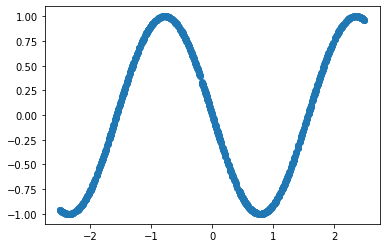

In [102]:
plt.scatter(X1, g1)

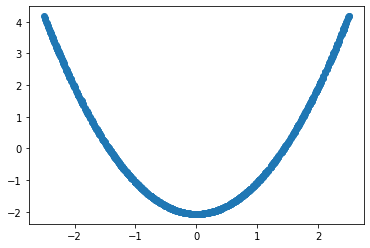

In [103]:
plt.scatter(X2, g2)

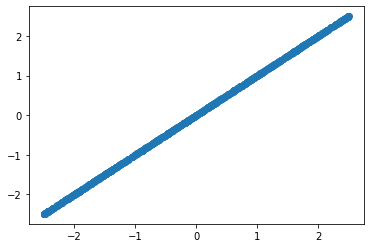

In [104]:
plt.scatter(X3, g3)

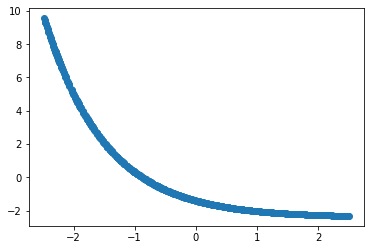

In [105]:
plt.scatter(X4, g4)

In [ ]:
#building the architecture of the NN
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu')) # model expects 2 input variables and 12 layers in first hidden layer
model.add(Dense(64, activation='relu')) # second hidden layer has 8 nodes
model.add(Dense(64, activation='relu')) # second hidden layer has 8 nodes
model.add(Dense(1, activation='linear')) # output layer has 1 node
model.compile(loss='mse', optimizer='rmsprop')
model.fit(design, dep, epochs=800, batch_size=230)
pred = model.predict(design)


Text(0, 0.5, 'dependent variable')

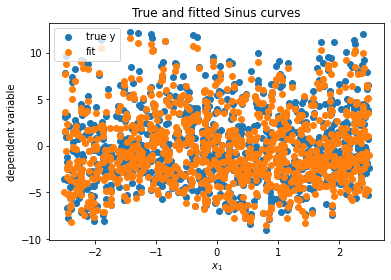

In [59]:
plt.figure(1)
plt.scatter(X1, dep, label="true y")
plt.scatter(X1, pred, label="fit")
plt.legend()

plt.title("True and fitted Sinus curves")
plt.xlabel("$x_1$")
plt.ylabel("dependent variable")


In [60]:
#shapley values for keras example
explainer = shap.KernelExplainer(model = model.predict, data = design.iloc[:,:], link = "identity")
shap_values = explainer.shap_values(design.iloc[:,:], nsamples=800)



Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1000 [00:00<?, ?it/s]

<Figure size 2400x2400 with 0 Axes>

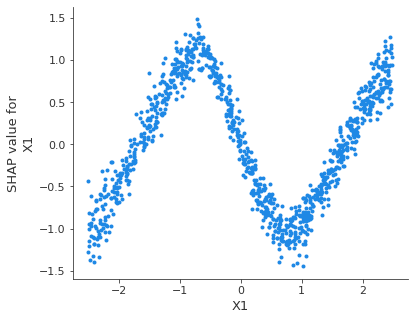

In [61]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("X1", shap_values[0], design, interaction_index=None) #works


<Figure size 2400x2400 with 0 Axes>

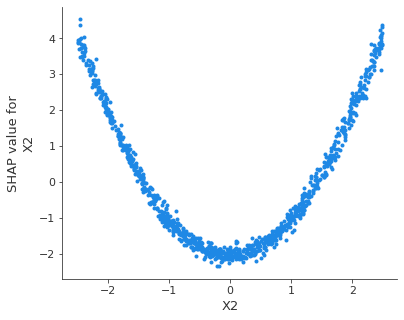

In [62]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("X2", shap_values[0], design, interaction_index=None) #works



<Figure size 2400x2400 with 0 Axes>

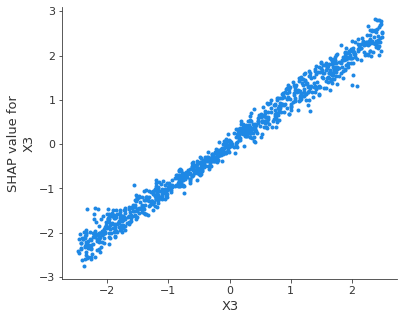

In [63]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("X3", shap_values[0], design, interaction_index=None) #works



<Figure size 2400x2400 with 0 Axes>

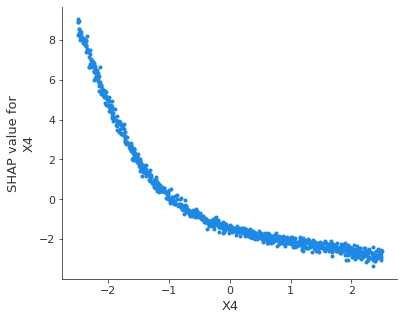

In [64]:
plt.figure(figsize=(12,12), dpi= 200)
shap.dependence_plot("X4", shap_values[0], design, interaction_index=None) #works



In [65]:
gam = LinearGAM(s(0, n_splines=10) + s(1, n_splines=10) + s(2, n_splines=10) + s(3, n_splines=10)).fit(design, dep)
f1 = gam.partial_dependence(term=0, X=design) # term from 0 to 3, this are the functions that we get
f2 = gam.partial_dependence(term=1, X=design) # term from 0 to 3, this are the functions that we get
f3 = gam.partial_dependence(term=2, X=design) # term from 0 to 3, this are the functions that we get
f4 = gam.partial_dependence(term=3, X=design) # term from 0 to 3, this are the functions that we get


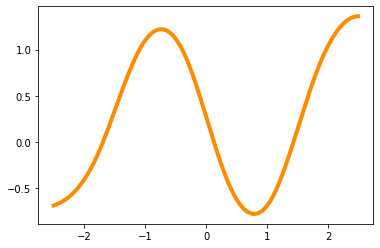

In [66]:
f1_panda = pd.DataFrame(f1)
f1_panda.columns = ['f1']
temp1 = pd.concat([X1_pandas['X1'], f1_panda], axis=1)
temp1 = temp1.sort_values("X1") # sort it for plot
plt.plot(temp1['X1'], temp1['f1'], label="$f_1(x_1)$", color="darkorange", linewidth=4)


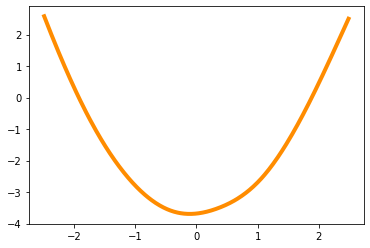

In [67]:
f2_panda = pd.DataFrame(f2)
f2_panda.columns = ['f2']
temp2 = pd.concat([X2_pandas['X2'], f2_panda], axis=1)
temp2 = temp2.sort_values("X2") # sort it for plot
plt.plot(temp2['X2'], temp2['f2'], label="$f_2(x_2)$", color="darkorange", linewidth=4)


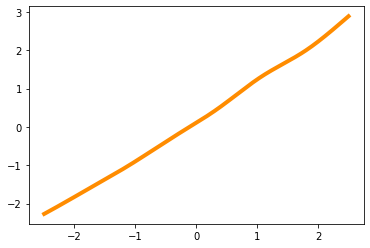

In [68]:
f3_panda = pd.DataFrame(f3)
f3_panda.columns = ['f3']
temp3 = pd.concat([X3_pandas['X3'], f3_panda], axis=1)
temp3 = temp3.sort_values("X3") # sort it for plot
plt.plot(temp3['X3'], temp3['f3'], label="$f_3(x_3)$", color="darkorange", linewidth=4)


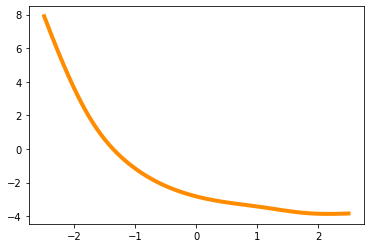

In [69]:
f4_panda = pd.DataFrame(f4)
f4_panda.columns = ['f4']
temp4 = pd.concat([X4_pandas['X4'], f4_panda], axis=1)
temp4 = temp4.sort_values("X4") # sort it for plot
plt.plot(temp4['X4'], temp4['f4'], label="$f_4(x_4)$", color="darkorange", linewidth=4)


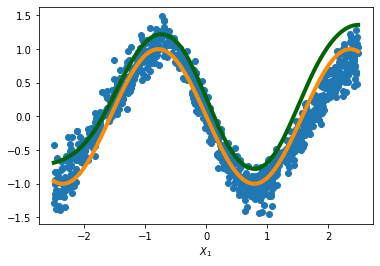

In [70]:
shaps1 = shap_values[0][:,0]    

plt.scatter(X1, shaps1)
plt.plot(temp1['X1'], temp1['f1'], color="darkgreen", linewidth=4)
plt.plot(temp1g['X1'], temp1g['g1'], color="darkorange", linewidth=4)
plt.xlabel("$X_1$")

plt.savefig('g1.png', transparent=True)



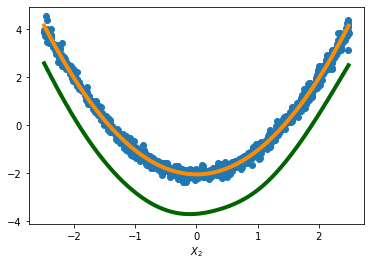

In [71]:
shaps2 = shap_values[0][:,1]    

plt.scatter(X2, shaps2)
plt.plot(temp2['X2'], temp2['f2'], color="darkgreen", linewidth=4)
plt.plot(temp2g['X2'], temp2g['g2'], color="darkorange", linewidth=4)
plt.xlabel("$X_2$")

plt.savefig('g2.png', transparent=True)





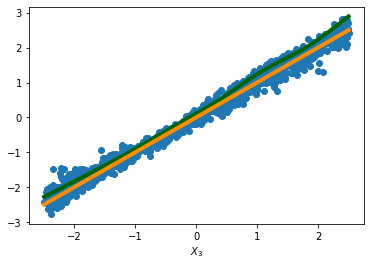

In [72]:
shaps3 = shap_values[0][:,2]    

plt.scatter(X3, shaps3)
plt.plot(temp3['X3'], temp3['f3'], color="darkgreen", linewidth=4)
plt.plot(temp3g['X3'], temp3g['g3'], color="darkorange", linewidth=4)
plt.xlabel("$X_3$")

plt.savefig('g3.png', transparent=True)




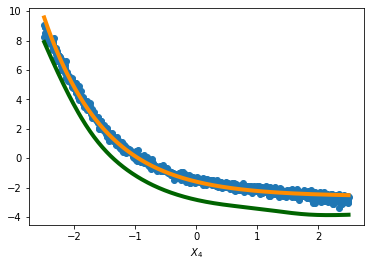

In [73]:
shaps4 = shap_values[0][:,3]    

plt.scatter(X4, shaps4)
plt.plot(temp4['X4'], temp4['f4'], color="darkgreen", linewidth=4)
plt.plot(temp4g['X4'], temp4g['g4'], color="darkorange", linewidth=4)
plt.xlabel("$X_4$")

plt.savefig('g4.png', transparent=True)

